<a href="https://colab.research.google.com/github/LilyMao/My-Data-Science-Playground/blob/main/Melbourne_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd
import numpy as np



In [86]:
df_listings=pd.read_json('melbourne_listing.json')
df_listings.shape

(233, 20)

In [87]:
df_listings=df_listings[['suburb','propertyType','bedrooms','bathrooms','carspaces','price']]
df_listings

,suburb,propertyType,bedrooms,bathrooms,carspaces,price
0,Abbotsford,Townhouse,2,2.0,1.0,880000.0
1,Ascot Vale,House,4,1.0,1.0,NaN
2,Ashwood,House,3,1.0,2.0,1612000.0
3,Aspendale Gardens,House,4,2.0,2.0,NaN
4,Attwood,House,4,1.0,2.0,780000.0
...,...,...,...,...,...,...
228,Werribee,House,4,2.0,2.0,700000.0
229,Werribee,House,4,2.0,2.0,550000.0
230,Wyndham Vale,House,3,1.0,2.0,450000.0
231,Yarraville,House,4,2.0,2.0,NaN


In [88]:
df_listings.isna().sum()

suburb            0
propertyType      0
bedrooms          0
bathrooms         3
carspaces         3
price           105
dtype: int64

In [6]:
df_listings.sort_values(by='suburb',inplace=True)

In [94]:
df_medians=pd.read_excel('House_Medians3rdQtr2020.xls',skiprows=1)
df_medians

,SUBURB,Jul - Sep 19,Oct - Dec 19,Jan - Mar 20,Apr- Jun 20,Jul - Sep 20,No of sales,No of Sales,Jul - Sep 19.1,Apr - Jun 20
0,NaN,NaN,NaN,NaN,NaN,NaN,Jul - Sep 20,YTD,Jul - Sep 20,Jul - Sep 20
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABBOTSFORD,1160000,1027500.0,1230000.0,1080000.0,1260000.0,8,33,8.6,16.7
3,ABERFELDIE,1352500,1650000.0,1732500.0,1375000.0,1600000.0,6,25,18.3,16.4
4,AINTREE,575000,620400.0,675000.0,685000.0,740000.0,8,52,28.7,8.0
...,...,...,...,...,...,...,...,...,...,...
758,YARRAM,224000,249800.0,259000.0,247500.0,241000.0,11,37,7.6,-2.6
759,YARRAVILLE,1010000,986000.0,952500.0,1050000.0,960100.0,26,106,-4.9,-8.6
760,YARRAWONGA,372500,389800.0,398000.0,452500.0,482500.0,42,107,29.5,6.6
761,YEA,470500,420000.0,395000.0,421300.0,495000.0,6,21,5.2,17.5


In [96]:
df_medians=df_medians[['SUBURB','Jul - Sep 20']]
df_medians

,SUBURB,Jul - Sep 20
0,NaN,NaN
1,NaN,NaN
2,ABBOTSFORD,1260000.0
3,ABERFELDIE,1600000.0
4,AINTREE,740000.0
...,...,...
758,YARRAM,241000.0
759,YARRAVILLE,960100.0
760,YARRAWONGA,482500.0
761,YEA,495000.0


In [106]:
df_medians.dropna(inplace=True)

In [105]:
df_medians['SUBURB']

0             NaN
1             NaN
2      ABBOTSFORD
3      ABERFELDIE
4         AINTREE
          ...    
758        YARRAM
759    YARRAVILLE
760    YARRAWONGA
761           YEA
762        YINNAR
Name: SUBURB, Length: 763, dtype: object

In [107]:
df_medians['SUBURB']=df_medians['SUBURB'].apply(lambda x:x.title())

In [108]:
with_medianprice=df_listings.merge(df_medians,left_on='suburb',right_on='SUBURB',how='left')

In [111]:
with_medianprice['price']=with_medianprice['price'].fillna(with_medianprice['Jul - Sep 20'])


In [112]:
with_medianprice.isna().sum()

suburb          0
propertyType    0
bedrooms        0
bathrooms       3
carspaces       3
price           2
SUBURB          6
Jul - Sep 20    6
dtype: int64

In [113]:
set(with_medianprice['suburb'].unique())-set(with_medianprice['SUBURB'].unique())

{'Newtown', 'Rippleside', 'Thomson'}

In [114]:
with_medianprice.dropna(inplace=True)

In [115]:
with_medianprice.shape

(224, 8)

In [116]:
with_medianprice.isna().sum()

suburb          0
propertyType    0
bedrooms        0
bathrooms       0
carspaces       0
price           0
SUBURB          0
Jul - Sep 20    0
dtype: int64

In [117]:
with_medianprice['Jul - Sep 20'].describe()

count    2.240000e+02
mean     9.863312e+05
std      5.448811e+05
min      1.950000e+05
25%      6.150000e+05
50%      8.263000e+05
75%      1.165000e+06
max      3.325000e+06
Name: Jul - Sep 20, dtype: float64

In [118]:
mask_high=(with_medianprice['Jul - Sep 20']>=1.160000e+06)
mask_medium=((with_medianprice['Jul - Sep 20']>=6.150000e+05)&(with_medianprice['Jul - Sep 20']<=1.160000e+06))
mask_low=(with_medianprice['Jul - Sep 20']<=6.150000e+05)


In [119]:
with_medianprice.loc[with_medianprice[mask_high].index,'suburb_rank']='high'
with_medianprice.loc[with_medianprice[mask_medium].index,'suburb_rank']='medium'
with_medianprice.loc[with_medianprice[mask_low].index,'suburb_rank']='low'

In [120]:
with_medianprice

,suburb,propertyType,bedrooms,bathrooms,carspaces,price,SUBURB,Jul - Sep 20,suburb_rank
0,Abbotsford,Townhouse,2,2.0,1.0,880000.0,Abbotsford,1260000.0,high
1,Ascot Vale,House,4,1.0,1.0,1328800.0,Ascot Vale,1328800.0,high
2,Ashwood,House,3,1.0,2.0,1612000.0,Ashwood,1210500.0,high
3,Aspendale Gardens,House,4,2.0,2.0,1002500.0,Aspendale Gardens,1002500.0,medium
4,Attwood,House,4,1.0,2.0,780000.0,Attwood,714000.0,medium
...,...,...,...,...,...,...,...,...,...
228,Werribee,House,4,2.0,2.0,700000.0,Werribee,518000.0,low
229,Werribee,House,4,2.0,2.0,550000.0,Werribee,518000.0,low
230,Wyndham Vale,House,3,1.0,2.0,450000.0,Wyndham Vale,482500.0,low
231,Yarraville,House,4,2.0,2.0,960100.0,Yarraville,960100.0,medium


In [121]:
with_medianprice.drop(columns=['SUBURB','Jul - Sep 20','suburb'],inplace=True)

In [48]:
with_medianprice.dtypes

propertyType     object
bedrooms          int64
bathrooms       float64
carspaces       float64
price           float64
suburb_rank      object
dtype: object

In [49]:
with_medianprice['price'].describe()

count    2.240000e+02
mean     1.040382e+06
std      5.307291e+05
min      2.780000e+05
25%      6.500000e+05
50%      9.022500e+05
75%      1.263750e+06
max      3.325000e+06
Name: price, dtype: float64

In [50]:
import matplotlib.pyplot as plt


{'boxes': [<matplotlib.lines.Line2D at 0x7fdeada60950>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdeada67e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdeadb4c990>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdeadb4c2d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdeada60c50>,
  <matplotlib.lines.Line2D at 0x7fdeada603d0>]}

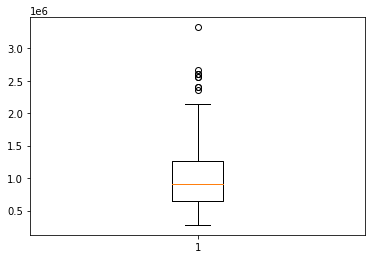

In [51]:
plt.boxplot(with_medianprice['price'])

In [122]:
mask=with_medianprice['price']>1000000
mask

0      False
1       True
2       True
3       True
4      False
       ...  
228    False
229    False
230    False
231    False
232    False
Name: price, Length: 224, dtype: bool

In [125]:
with_medianprice.loc[mask,'price']=1



In [126]:
with_medianprice.loc[~mask,'price']=0

In [127]:
with_medianprice['price'].value_counts()

0.0    130
1.0     94
Name: price, dtype: int64

In [128]:
with_medianprice

,propertyType,bedrooms,bathrooms,carspaces,price,suburb_rank
0,Townhouse,2,2.0,1.0,0.0,high
1,House,4,1.0,1.0,1.0,high
2,House,3,1.0,2.0,1.0,high
3,House,4,2.0,2.0,1.0,medium
4,House,4,1.0,2.0,0.0,medium
...,...,...,...,...,...,...
228,House,4,2.0,2.0,0.0,low
229,House,4,2.0,2.0,0.0,low
230,House,3,1.0,2.0,0.0,low
231,House,4,2.0,2.0,0.0,medium


In [130]:
X=with_medianprice.drop(columns='price')
y=with_medianprice['price']

In [132]:
y

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
228    0.0
229    0.0
230    0.0
231    0.0
232    0.0
Name: price, Length: 224, dtype: float64

In [131]:
X=pd.get_dummies(X,columns=['propertyType','suburb_rank'],prefix=['propertyType','suburb_rank'],drop_first=True)
X

,bedrooms,bathrooms,carspaces,propertyType_Townhouse,propertyType_Unit,suburb_rank_low,suburb_rank_medium
0,2,2.0,1.0,1,0,0,0
1,4,1.0,1.0,0,0,0,0
2,3,1.0,2.0,0,0,0,0
3,4,2.0,2.0,0,0,0,1
4,4,1.0,2.0,0,0,0,1
...,...,...,...,...,...,...,...
228,4,2.0,2.0,0,0,1,0
229,4,2.0,2.0,0,0,1,0
230,3,1.0,2.0,0,0,1,0
231,4,2.0,2.0,0,0,0,1


In [140]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [141]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
print (f'Train Accuracy - : {rf_clf.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_clf.score(X_test,y_test):.3f}')

Train Accuracy - : 0.893
Test Accuracy - : 0.804


In [139]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

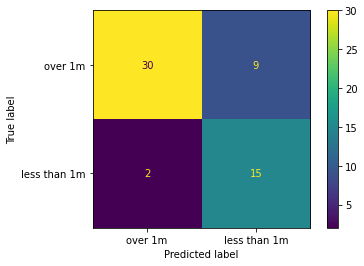

In [144]:
#plot confusion matrix
plot_confusion_matrix(rf_clf,X_test,y_test,display_labels=["over 1m","less than 1m"])

In [177]:
rf_clf.predict([[3,2,2,0,0,0,1]])

array([1.])